# Noise2Void - 3D Example for Flywing Data

In [33]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

## Load the Network

In [17]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'n2v_3D_kelin_superlong'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [25]:
# We load the data we want to process.
img = imread('/home/ninatubau/mnt/gp_transfer/Caleb/Noise2Void/n2v_input.tif')
img_lachie = imread('/home/ninatubau/mnt/gp_transfer/Caleb/Noise2Void/n2v_output.tif')
img_nina = imread('/home/ninatubau/mnt/gp_transfer/Caleb/Noise2Void/prediction.tif')

In [5]:
img = imread('data/Kelin/noisy_test.tif')

In [15]:
img_clean = imread('data/Kelin/clean_test.tif')

In [6]:
img.shape

(4, 10560, 7104)

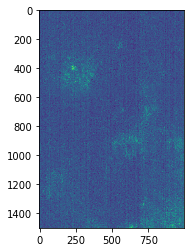

In [10]:
plt.imshow(img[0,3000:4500,2000:3000])

In [21]:
img.shape

(4, 10560, 7104)

In [22]:
# Here we process the data.
# The 'n_tiles' parameter can be used if images are too big for the GPU memory.
# If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
#prediction = [] 
#for ch in range(img.shape[1]):
pred = model.predict(img[0], axes='XY', n_tiles=(100,100))
#prediction.append(pred)
#final = np.stack(prediction, axis=0)

The input image is of type uint16 and will be casted to float32 for prediction.


100%|██████████| 10000/10000 [03:08<00:00, 53.03it/s]


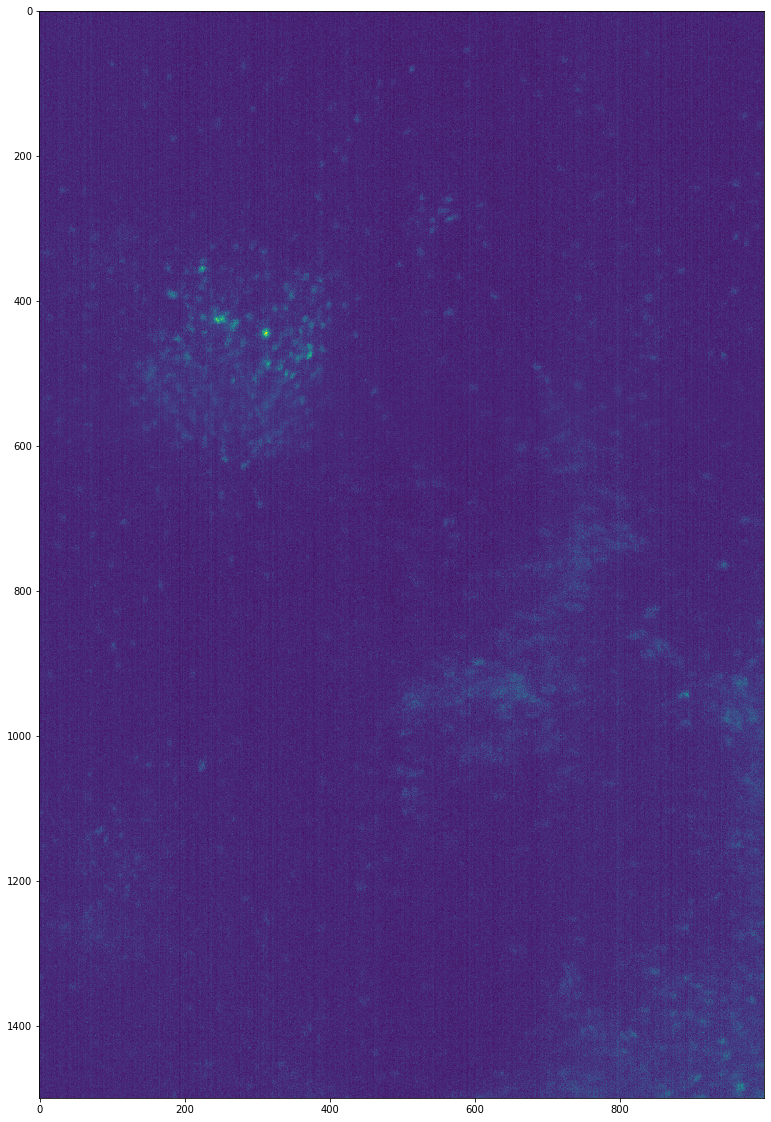

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(img_clean[0,3000:4500,2000:3000])

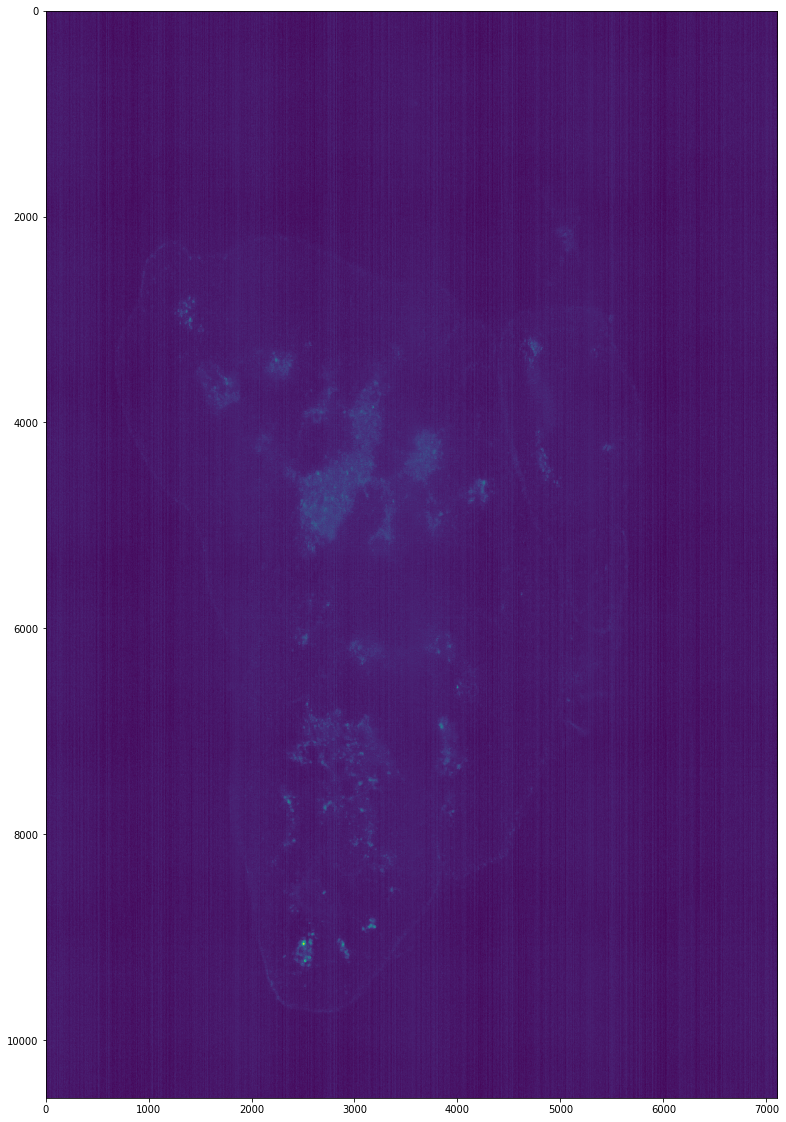

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(pred)

In [30]:
imsave('/home/ninatubau/Desktop/kelin_prediction.tif',pred)

In [31]:
imsave('/home/ninatubau/Desktop/kelin_real.tif',img_clean[0])

In [32]:
imsave('/home/ninatubau/Desktop/kelin_noisy.tif',img[0])

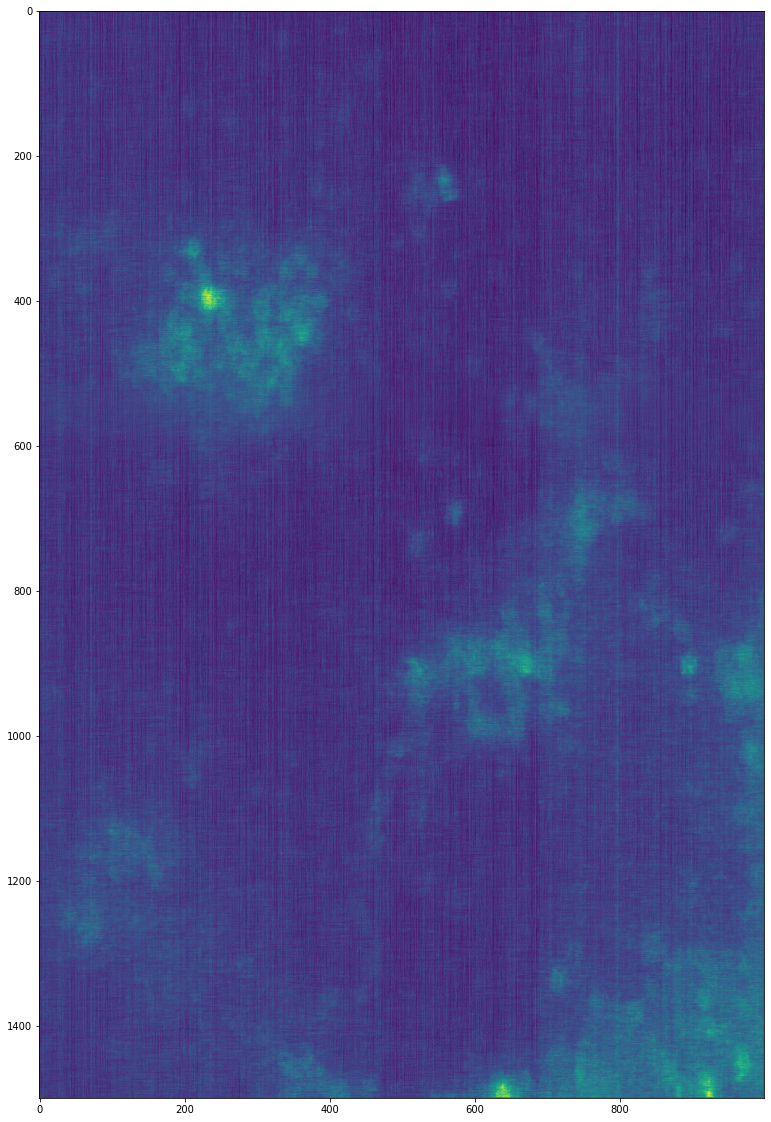

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(pred)

In [33]:
model_name = 'n2v_3D_test0'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)
pred_ = model.predict(img, axes='ZCYX')

Loading network weights from 'weights_best.h5'.
The input image is of type uint16 and will be casted to float32 for prediction.


In [37]:
img.shape

(81, 5, 512, 512)

In [35]:
imsave('/home/ninatubau/mnt/gp_transfer/Caleb/Noise2Void/prediction_.tif',pred_)

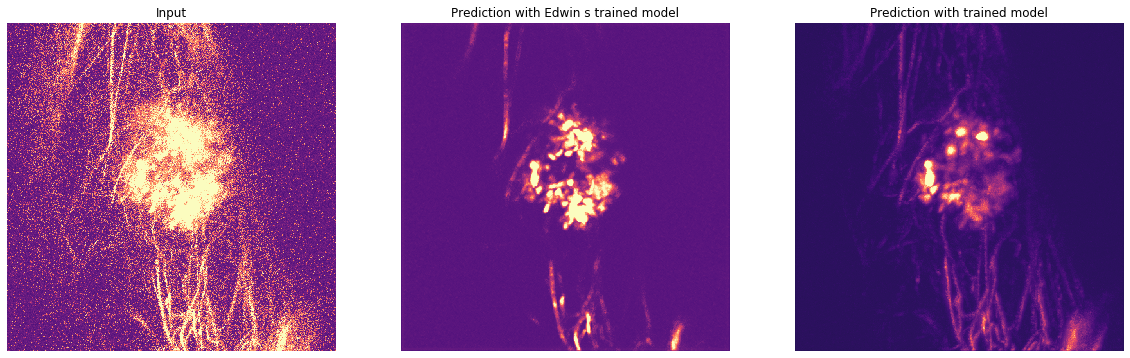

In [38]:
# Let's look at the results.
plt.figure(figsize=(20,20))


# We show the noisy input...
plt.subplot(1,3,1)
plt.imshow(np.max(img[:,2,:,:],axis=0),
               cmap='magma',
               vmin=np.percentile(img,0.1),
               vmax=np.percentile(img,99.9)
              )
plt.axis('off')
plt.title('Input');

plt.subplot(1,3,2)
plt.imshow(np.max(final[2,:,:,:],axis=0), 
               cmap='magma',
               vmin=np.percentile(img,0.1),
               vmax=np.percentile(img,99.9)
              )
plt.title('Prediction with Edwin s trained model');
plt.axis('off')
# and the result.
plt.subplot(1,3,3)
plt.imshow(np.max(pred_[:,2,:,:],axis=0), 
               cmap='magma',
               vmin=np.percentile(img,0.1),
               vmax=np.percentile(img,99.9)
              )
plt.title('Prediction with trained model');
plt.axis('off')
plt.savefig('/home/ninatubau/Desktop/Caleb_data.png')

## Save results

In [11]:
pred.shape

(81, 5, 512, 512)

In [12]:
save_tiff_imagej_compatible('/home/ninatubau/mnt/gp_transfer/Caleb/Noise2Void/prediction.tif', pred, 'ZCYX')